<a href="https://colab.research.google.com/github/eyang16/ECGR_4105_ML_Fall_2025/blob/main/ECGR_4105_ML_HW5_Eyang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Homework 5
# Ethan Yang
# ID: 801250277
# ECGR_4105_Machine_Learning

In [9]:
# Problem 1.a
import torch

# Data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_u = torch.tensor(t_u)
t_c = torch.tensor(t_c)

# Normalize input
t_un = t_u * 0.1

# Non-linear Model
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

# Loss Function
def loss_fn(t_p, t_c):
    return ((t_p - t_c)**2).mean()

# Initialize parameters
w1 = torch.ones(1, requires_grad=True)
w2 = torch.ones(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# Training parameters
learning_rate = 1e-3
n_epochs = 5000

for epoch in range(n_epochs):
    # Forward pass
    t_p = model(t_un, w1, w2, b)
    loss = loss_fn(t_p, t_c)

    # Backpropagation
    loss.backward()

    # Update parameters manually
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b -= learning_rate * b.grad

        # Zero gradients
        w1.grad.zero_()
        w2.grad.zero_()
        b.grad.zero_()

    # Print every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch:5d} | Loss: {loss.item():.4f}")

# Final trained parameters
print(f"\nTrained parameters:")
print(f"w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, b = {b.item():.4f}")


Epoch     0 | Loss: 675.7944
Epoch   500 | Loss: nan
Epoch  1000 | Loss: nan
Epoch  1500 | Loss: nan
Epoch  2000 | Loss: nan
Epoch  2500 | Loss: nan
Epoch  3000 | Loss: nan
Epoch  3500 | Loss: nan
Epoch  4000 | Loss: nan
Epoch  4500 | Loss: nan

Trained parameters:
w1 = nan, w2 = nan, b = nan


In [10]:
# Problem 1.b
# Normalize input
t_un = t_u * 0.1

# Non-linear Model
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

# Loss Function
def loss_fn(t_p, t_c):
    return ((t_p - t_c)**2).mean()

# Training function
def train_model(learning_rate, n_epochs=5000):
    # Initialize parameters
    w1 = torch.ones(1, requires_grad=True)
    w2 = torch.ones(1, requires_grad=True)
    b = torch.zeros(1, requires_grad=True)

    print(f"\nTraining with learning rate = {learning_rate}\n{'-'*40}")

    for epoch in range(n_epochs):
        # Forward pass
        t_p = model(t_un, w1, w2, b)
        loss = loss_fn(t_p, t_c)

        # Backpropagation
        loss.backward()

        # Update parameters manually
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            b -= learning_rate * b.grad

            # Zero gradients
            w1.grad.zero_()
            w2.grad.zero_()
            b.grad.zero_()

        # Print every 500 epochs
        if epoch % 500 == 0:
            print(f"Epoch {epoch:5d} | Loss: {loss.item():.4f}")

    print(f"\nTrained parameters: w1={w1.item():.4f}, w2={w2.item():.4f}, b={b.item():.4f}")

# Learning rates to explore
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Run training for each learning rate
for lr in learning_rates:
    train_model(lr)


Training with learning rate = 0.1
----------------------------------------
Epoch     0 | Loss: 675.7944
Epoch   500 | Loss: nan
Epoch  1000 | Loss: nan
Epoch  1500 | Loss: nan
Epoch  2000 | Loss: nan
Epoch  2500 | Loss: nan
Epoch  3000 | Loss: nan
Epoch  3500 | Loss: nan
Epoch  4000 | Loss: nan
Epoch  4500 | Loss: nan

Trained parameters: w1=nan, w2=nan, b=nan

Training with learning rate = 0.01
----------------------------------------
Epoch     0 | Loss: 675.7944
Epoch   500 | Loss: nan
Epoch  1000 | Loss: nan
Epoch  1500 | Loss: nan
Epoch  2000 | Loss: nan
Epoch  2500 | Loss: nan
Epoch  3000 | Loss: nan
Epoch  3500 | Loss: nan
Epoch  4000 | Loss: nan
Epoch  4500 | Loss: nan

Trained parameters: w1=nan, w2=nan, b=nan

Training with learning rate = 0.001
----------------------------------------
Epoch     0 | Loss: 675.7944
Epoch   500 | Loss: nan
Epoch  1000 | Loss: nan
Epoch  1500 | Loss: nan
Epoch  2000 | Loss: nan
Epoch  2500 | Loss: nan
Epoch  3000 | Loss: nan
Epoch  3500 | Loss: 

Training Linear Model:
Epoch     0 | Loss: 80.3643
Epoch   500 | Loss: 7.8434
Epoch  1000 | Loss: 3.8255
Epoch  1500 | Loss: 3.0916
Epoch  2000 | Loss: 2.9576
Epoch  2500 | Loss: 2.9331
Epoch  3000 | Loss: 2.9286
Epoch  3500 | Loss: 2.9278
Epoch  4000 | Loss: 2.9277
Epoch  4500 | Loss: 2.9277

Training Non-linear Model:
Epoch     0 | Loss: 675.7944
Epoch   500 | Loss: nan
Epoch  1000 | Loss: nan
Epoch  1500 | Loss: nan
Epoch  2000 | Loss: nan
Epoch  2500 | Loss: nan
Epoch  3000 | Loss: nan
Epoch  3500 | Loss: nan
Epoch  4000 | Loss: nan
Epoch  4500 | Loss: nan


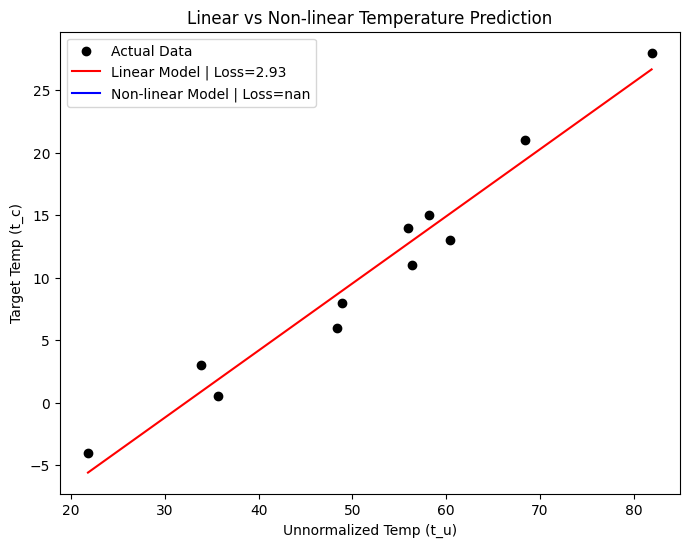

Final Linear Loss: 2.9276
Final Non-linear Loss: nan
Non-linear model did NOT improve over the linear baseline.


In [11]:
# Problem 1.c
import matplotlib.pyplot as plt

# Normalize input
t_un = t_u * 0.1

# Linear Model
def linear_model(t_u, w, b):
    return w * t_u + b

# Non-linear Model (quadratic)
def nonlinear_model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

# Loss function
def loss_fn(t_p, t_c):
    return ((t_p - t_c)**2).mean()

# Training function
def train(model_fn, learning_rate, n_epochs=5000):
    # Initialize parameters
    if model_fn == linear_model:
        w = torch.ones(1, requires_grad=True)
        b = torch.zeros(1, requires_grad=True)
        params = [w, b]
    else:  # nonlinear
        w1 = torch.ones(1, requires_grad=True)
        w2 = torch.ones(1, requires_grad=True)
        b = torch.zeros(1, requires_grad=True)
        params = [w1, w2, b]

    for epoch in range(n_epochs):
        # Forward
        t_p = model_fn(t_un, *params)
        loss = loss_fn(t_p, t_c)

        # Backprop
        loss.backward()

        # Update
        with torch.no_grad():
            for p in params:
                p -= learning_rate * p.grad
                p.grad.zero_()

        # Print every 500 epochs
        if epoch % 500 == 0:
            print(f"Epoch {epoch:5d} | Loss: {loss.item():.4f}")

    # Return trained parameters and final loss
    return params, loss.item()

# Train linear model
print("Training Linear Model:")
linear_params, linear_loss = train(linear_model, learning_rate=0.01)
w_lin, b_lin = linear_params

# Train nonlinear model
print("\nTraining Non-linear Model:")
nonlinear_params, nonlinear_loss = train(nonlinear_model, learning_rate=0.001)
w1_nl, w2_nl, b_nl = nonlinear_params

# Visualization
t_plot = torch.linspace(min(t_u), max(t_u), 100)
t_plot_norm = t_plot * 0.1

with torch.no_grad():
    t_pred_linear = linear_model(t_plot_norm, w_lin, b_lin)
    t_pred_nonlinear = nonlinear_model(t_plot_norm, w1_nl, w2_nl, b_nl)

plt.figure(figsize=(8,6))
plt.scatter(t_u, t_c, label="Actual Data", color="black")
plt.plot(t_plot, t_pred_linear, 'r-', label=f"Linear Model | Loss={linear_loss:.2f}")
plt.plot(t_plot, t_pred_nonlinear, 'b-', label=f"Non-linear Model | Loss={nonlinear_loss:.2f}")
plt.xlabel("Unnormalized Temp (t_u)")
plt.ylabel("Target Temp (t_c)")
plt.title("Linear vs Non-linear Temperature Prediction")
plt.legend()
plt.show()

# Report
print(f"Final Linear Loss: {linear_loss:.4f}")
print(f"Final Non-linear Loss: {nonlinear_loss:.4f}")

if nonlinear_loss < linear_loss:
    print("Non-linear model performs better than linear model.")
else:
    print("Non-linear model did NOT improve over the linear baseline.")

In [12]:
# Problem 2.a
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
housing_url = 'https://raw.githubusercontent.com/eyang16/ECGR_4105_ML_Fall_2025/refs/heads/main/Homework_4/Housing.csv'
housing_df = pd.read_csv(housing_url)

# Select input features and target variable
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = housing_df[features].values
y = housing_df[target].values.reshape(-1, 1)  # make it 2D

# Split into training and validation sets (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for gradient descent)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)

y_train = scaler_y.fit_transform(y_train)
y_val = scaler_y.transform(y_val)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Define the linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # 5 inputs -> 1 output

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel(input_dim=5)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr=0.01)  # you can tune lr

# Training loop
num_epochs = 500

for epoch in range(num_epochs):
    model.train()

    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    if (epoch+1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}")

# Print final model parameters (W1..W5 and B)
for name, param in model.named_parameters():
    print(f"{name}: {param.data.numpy().flatten()}")


Epoch [50/500], Train Loss: 0.5780, Val Loss: 1.0033
Epoch [100/500], Train Loss: 0.4518, Val Loss: 0.7930
Epoch [150/500], Train Loss: 0.4384, Val Loss: 0.7506
Epoch [200/500], Train Loss: 0.4378, Val Loss: 0.7443
Epoch [250/500], Train Loss: 0.4378, Val Loss: 0.7436
Epoch [300/500], Train Loss: 0.4378, Val Loss: 0.7436
Epoch [350/500], Train Loss: 0.4378, Val Loss: 0.7436
Epoch [400/500], Train Loss: 0.4378, Val Loss: 0.7436
Epoch [450/500], Train Loss: 0.4378, Val Loss: 0.7436
Epoch [500/500], Train Loss: 0.4378, Val Loss: 0.7436
linear.weight: [0.3872861  0.0643371  0.32199407 0.24166547 0.16421156]
linear.bias: [-1.4863935e-08]


In [13]:
# Problem 2.b
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
housing_url = 'https://raw.githubusercontent.com/eyang16/ECGR_4105_ML_Fall_2025/refs/heads/main/Homework_5/Housing.csv'
housing_df = pd.read_csv(housing_url)

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = housing_df[features].values
y = housing_df[target].values.reshape(-1, 1)

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)

y_train = scaler_y.fit_transform(y_train)
y_val = scaler_y.transform(y_val)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Define model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    def forward(self, x):
        return self.linear(x)

# Training function
def train_model(lr, num_epochs=5000):
    model = LinearRegressionModel(input_dim=5)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    print(f"\nTraining with learning rate = {lr}")
    for epoch in range(1, num_epochs+1):
        # Train
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        # Validation
        if epoch % 500 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val_tensor)
                val_loss = criterion(val_outputs, y_val_tensor)
            print(f"Epoch {epoch}: Train Loss = {loss.item():.6f}, Val Loss = {val_loss.item():.6f}")

    return model, loss.item(), val_loss.item()

# Run trainings with different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
results = []

for lr in learning_rates:
    model, train_loss, val_loss = train_model(lr)
    results.append({
        'lr': lr,
        'model': model,
        'train_loss': train_loss,
        'val_loss': val_loss,
        'weights': model.linear.weight.data.numpy().flatten(),
        'bias': model.linear.bias.data.numpy()[0]
    })

# Pick the best model based on lowest validation loss
best_model_info = min(results, key=lambda x: x['val_loss'])
print("\nBest Model Summary:")
print(f"Learning Rate: {best_model_info['lr']}")
print(f"Train Loss: {best_model_info['train_loss']:.6f}")
print(f"Validation Loss: {best_model_info['val_loss']:.6f}")
print(f"Weights (W1..W5): {best_model_info['weights']}")
print(f"Bias (B): {best_model_info['bias']}")



Training with learning rate = 0.1
Epoch 500: Train Loss = 0.437832, Val Loss = 0.743571
Epoch 1000: Train Loss = 0.437832, Val Loss = 0.743571
Epoch 1500: Train Loss = 0.437832, Val Loss = 0.743593
Epoch 2000: Train Loss = 0.438041, Val Loss = 0.741749
Epoch 2500: Train Loss = 0.437832, Val Loss = 0.743572
Epoch 3000: Train Loss = 0.437842, Val Loss = 0.747340
Epoch 3500: Train Loss = 0.437832, Val Loss = 0.743572
Epoch 4000: Train Loss = 0.437833, Val Loss = 0.743717
Epoch 4500: Train Loss = 0.437832, Val Loss = 0.743571
Epoch 5000: Train Loss = 0.437833, Val Loss = 0.743289

Training with learning rate = 0.01
Epoch 500: Train Loss = 0.437832, Val Loss = 0.743571
Epoch 1000: Train Loss = 0.437832, Val Loss = 0.743571
Epoch 1500: Train Loss = 0.437832, Val Loss = 0.743571
Epoch 2000: Train Loss = 0.437832, Val Loss = 0.743571
Epoch 2500: Train Loss = 0.437832, Val Loss = 0.743571
Epoch 3000: Train Loss = 0.437832, Val Loss = 0.743571
Epoch 3500: Train Loss = 0.437832, Val Loss = 0.743

In [14]:
# Problem 3.a
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing_url = 'https://raw.githubusercontent.com/eyang16/ECGR_4105_ML_Fall_2025/refs/heads/main/Homework_5/Housing.csv'
housing_df = pd.read_csv(housing_url)

features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = housing_df[features].values
y = housing_df[target].values.reshape(-1, 1)

# Train / validation split (80/20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
y_train = scaler_y.fit_transform(y_train)
y_val = scaler_y.transform(y_val)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)


# Neural Network

class HousingNN(nn.Module):
    def __init__(self, input_dim):
        super(HousingNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 8)   # Hidden layer with 8 nodes
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)           # Output layer (predict price)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = HousingNN(input_dim=5)

# Loss, optimizer, and training parameters

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 200

# Training loop with timing

start_time = time.time()

for epoch in range(1, num_epochs + 1):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    if epoch % 20 == 0:
        print(f"Epoch [{epoch}/{num_epochs}] - Train Loss: {loss.item():.6f}, Val Loss: {val_loss.item():.6f}")

end_time = time.time()
training_time = end_time - start_time

# Evaluation

model.eval()
with torch.no_grad():
    val_preds = model(X_val_tensor)
    val_mse = criterion(val_preds, y_val_tensor).item()

    # Convert back to original price scale
    val_preds_unscaled = scaler_y.inverse_transform(val_preds.numpy())
    y_val_unscaled = scaler_y.inverse_transform(y_val)

# Compute R² as evaluation metric
ss_res = ((y_val_unscaled - val_preds_unscaled) ** 2).sum()
ss_tot = ((y_val_unscaled - y_val_unscaled.mean()) ** 2).sum()
r2_score = 1 - (ss_res / ss_tot)

print("\n-----------------------------------")
print("Training Summary")
print("-----------------------------------")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss (MSE): {loss.item():.6f}")
print(f"Final Validation Loss (MSE): {val_loss.item():.6f}")
print(f"Evaluation Accuracy (R²): {r2_score:.4f}")
print("-----------------------------------")


Epoch [20/200] - Train Loss: 0.653243, Val Loss: 1.134882
Epoch [40/200] - Train Loss: 0.469224, Val Loss: 0.758564
Epoch [60/200] - Train Loss: 0.426844, Val Loss: 0.745070
Epoch [80/200] - Train Loss: 0.414784, Val Loss: 0.731842
Epoch [100/200] - Train Loss: 0.405476, Val Loss: 0.729268
Epoch [120/200] - Train Loss: 0.398486, Val Loss: 0.724535
Epoch [140/200] - Train Loss: 0.393060, Val Loss: 0.730264
Epoch [160/200] - Train Loss: 0.389035, Val Loss: 0.730440
Epoch [180/200] - Train Loss: 0.386386, Val Loss: 0.728816
Epoch [200/200] - Train Loss: 0.384485, Val Loss: 0.731765

-----------------------------------
Training Summary
-----------------------------------
Training Time: 0.21 seconds
Final Training Loss (MSE): 0.384485
Final Validation Loss (MSE): 0.731765
Evaluation Accuracy (R²): 0.5536
-----------------------------------


In [15]:
# Problem 3.b
import time


features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

X = housing_df[features].values
y = housing_df[target].values.reshape(-1, 1)

# Split 80% train / 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
y_train = scaler_y.fit_transform(y_train)
y_val = scaler_y.transform(y_val)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Define a deeper neural network (3 hidden layers)

class DeepHousingNN(nn.Module):
    def __init__(self, input_dim):
        super(DeepHousingNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 12),
            nn.ReLU(),
            nn.Linear(12, 8),
            nn.ReLU(),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.network(x)

model = DeepHousingNN(input_dim=5)

# Loss, optimizer, and training parameters

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
num_epochs = 200

# Training loop

start_time = time.time()

for epoch in range(1, num_epochs + 1):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)

    if epoch % 20 == 0:
        print(f"Epoch [{epoch:3d}/{num_epochs}] | Train Loss: {loss.item():.6f} | Val Loss: {val_loss.item():.6f}")

end_time = time.time()
training_time = end_time - start_time

# Evaluation

model.eval()
with torch.no_grad():
    val_preds = model(X_val_tensor)
    val_loss = criterion(val_preds, y_val_tensor).item()

    # Back-transform predictions to original price scale
    val_preds_unscaled = scaler_y.inverse_transform(val_preds.numpy())
    y_val_unscaled = scaler_y.inverse_transform(y_val)

# Compute R² score
ss_res = ((y_val_unscaled - val_preds_unscaled) ** 2).sum()
ss_tot = ((y_val_unscaled - y_val_unscaled.mean()) ** 2).sum()
r2_score = 1 - ss_res / ss_tot

print("\n-----------------------------------")
print("Training Summary")
print("-----------------------------------")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss (MSE): {loss.item():.6f}")
print(f"Final Validation Loss (MSE): {val_loss:.6f}")
print(f"Evaluation Accuracy (R²): {r2_score:.4f}")
print("-----------------------------------")


Epoch [ 20/200] | Train Loss: 0.520226 | Val Loss: 0.811544
Epoch [ 40/200] | Train Loss: 0.417977 | Val Loss: 0.718069
Epoch [ 60/200] | Train Loss: 0.391720 | Val Loss: 0.717364
Epoch [ 80/200] | Train Loss: 0.371502 | Val Loss: 0.712291
Epoch [100/200] | Train Loss: 0.354621 | Val Loss: 0.728101
Epoch [120/200] | Train Loss: 0.337841 | Val Loss: 0.751587
Epoch [140/200] | Train Loss: 0.324569 | Val Loss: 0.762786
Epoch [160/200] | Train Loss: 0.312470 | Val Loss: 0.780045
Epoch [180/200] | Train Loss: 0.300660 | Val Loss: 0.820159
Epoch [200/200] | Train Loss: 0.285915 | Val Loss: 0.839333

-----------------------------------
Training Summary
-----------------------------------
Training Time: 0.37 seconds
Final Training Loss (MSE): 0.285915
Final Validation Loss (MSE): 0.839333
Evaluation Accuracy (R²): 0.4880
-----------------------------------
